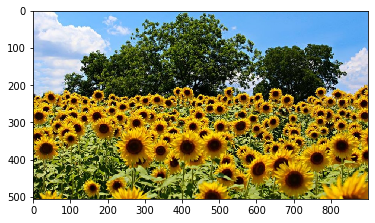

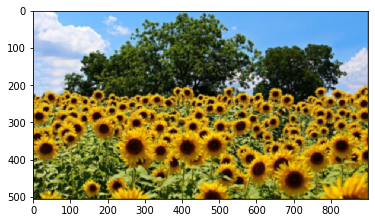

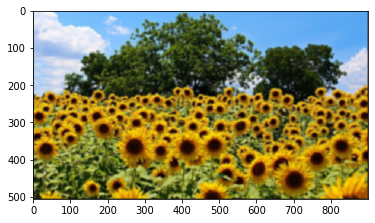

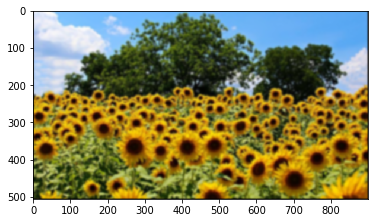

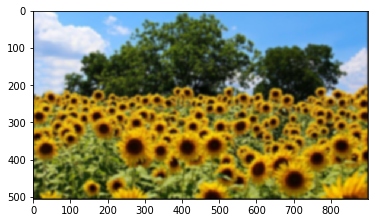

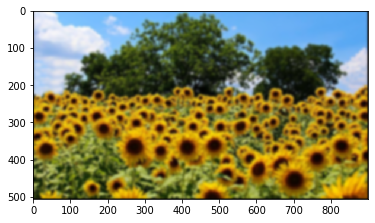

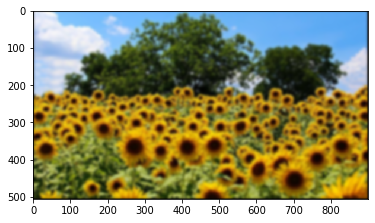

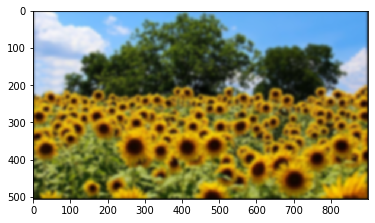

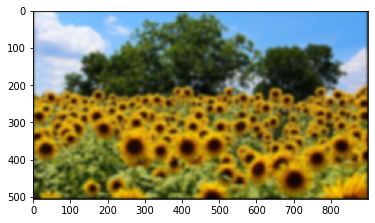

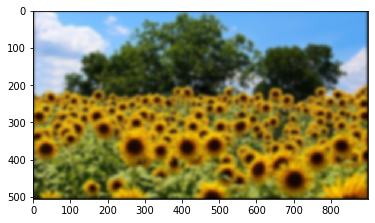

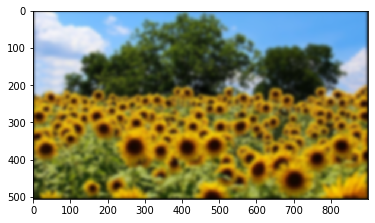

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

#set steps
steps = 100

# read image 
src_img = plt.imread('sunflower.png').astype(float)

# init pre_L
pre_L = src_img.copy()

for n in range(steps+1):
    
    # pad for getting a new time L variable
    pad_img = np.pad(pre_L, ((1,1), (1,1), (0,0)), 'constant')

    # set L(i-1,j), L(i, j), L(i+1, j), L(i, j-1), L(i, j), L(i, j+1)
    L_isum1j = pad_img[1:-1, 2:, :]
    L_ij = pad_img[1:-1, 1:-1, :]
    L_isub1j = pad_img[1:-1, 0:-2, :]

    L_ijsum1 = pad_img[2:, 1:-1, :]
    L_ijsub1 = pad_img[0:-2, 1:-1, :]

    # get a new L variable
    new_L = pre_L + 0.1*((L_isum1j -2*L_ij + L_isub1j) + (L_ijsum1 -2*L_ij + L_ijsub1))

    if n%10 == 0:
        plt.figure()
        plt.imshow(new_L)
        plt.show()

    # set pre_L to new_L
    pre_L = new_L.copy()